# OCR

In [66]:
import easyocr
import PIL
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import requests
# from imutils.perspective import four_point_transform
# from imutils.contours import sort_contours
# import imutils

import warnings
warnings.filterwarnings("ignore")

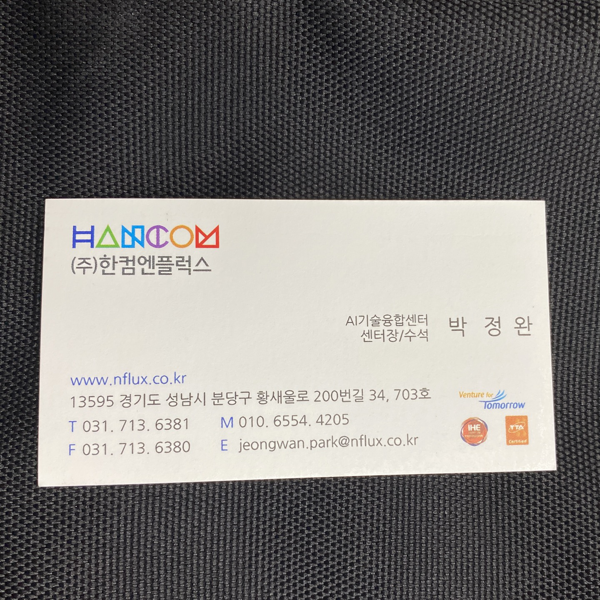

In [25]:
img = PIL.Image.open("card-600.png")
img

In [65]:
# 영어 : en
# 한국어 : ko

# Detection 박스 좌표, Recognition 결과, Confidence를 차례대로 보여줌
reader = easyocr.Reader(['ko', 'en'], gpu=False)
results = reader.readtext('card-600.png')
print(results)

Using CPU. Note: This module is much faster with a GPU.


[([[67, 219], [225, 219], [225, 255], [67, 255]], 'HA6CO-', 0.09235170247689256), ([[70, 250], [216, 250], [216, 282], [70, 282]], '(주한컴언플렉스', 0.3827407011988284), ([[343, 311], [433, 311], [433, 347], [343, 347]], '세l습움학수적', 0.010694968936271577), ([[444, 312], [534, 312], [534, 342], [444, 342]], '박 정 완', 0.673233335333854), ([[71, 371], [189, 371], [189, 389], [71, 389]], 'WWW nfluxcokr', 0.703673519992345), ([[66, 384], [434, 384], [434, 413], [66, 413]], '13595 경기도 성남시 분당구 항새울로 200번길 34, 703호', 0.7272328913488129), ([[458, 390], [492, 390], [492, 398], [458, 398]], 'VTaify {', 0.04359893859801359), ([[482, 402], [524, 402], [524, 410], [482, 410]], 'lomorrow', 0.29484409837110115), ([[67, 415], [191, 415], [191, 435], [67, 435]], 'T031. 713. 6381', 0.6593818173266327), ([[219, 411], [351, 411], [351, 431], [219, 431]], 'M 010. 6554.4205', 0.8560183733294057), ([[78, 436], [194, 436], [194, 460], [78, 460]], '031. 713.6380', 0.7532534683118824), ([[237, 439], [309, 439], [309, 455]

In [64]:
# 글자만 추출 List 형태로 Return
reader = easyocr.Reader(['ko', 'en'], gpu=False)
simple_results = reader.readtext('card-600.png', detail = 0)
simple_results

Using CPU. Note: This module is much faster with a GPU.


['HA6CO-',
 '(주한컴언플렉스',
 '세l습움학수적',
 '박 정 완',
 'WWW nfluxcokr',
 '13595 경기도 성남시 분당구 항새울로 200번길 34, 703호',
 'VTaify {',
 'lomorrow',
 'T031. 713. 6381',
 'M 010. 6554.4205',
 '031. 713.6380',
 'jeongwan',
 'park@nflux.cokr']

In [27]:
# only detection
reader = easyocr.Reader(['ko', 'en'], gpu=False)
result = reader.detect('card-600.png') # detect 함수 사용
print(result)

Using CPU. Note: This module is much faster with a GPU.


([[[67, 225, 219, 255], [70, 216, 250, 282], [343, 433, 311, 347], [444, 534, 312, 342], [71, 189, 371, 389], [66, 434, 384, 413], [458, 492, 390, 398], [482, 524, 402, 410], [67, 191, 415, 435], [219, 351, 411, 431], [78, 194, 436, 460], [237, 309, 439, 455], [307, 422, 429, 454]]], [[]])


In [28]:
# only recognition
reader = easyocr.Reader(['ko', 'en'], gpu=False)
result = reader.recognize('card-600.png') # detect 함수 사용
print(result)

Using CPU. Note: This module is much faster with a GPU.


[([[0, 0], [600, 0], [600, 600], [0, 600]], 'L', 0.26933036897389684)]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


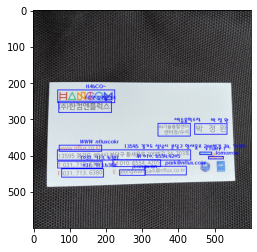

In [62]:
reader = easyocr.Reader(['ko','en']) # need to run only once to load model into memory
result = reader.readtext('card-600.png')

img    = cv2.imread('card-600.png')

img = Image.fromarray(img)
font = ImageFont.load_default()
font = ImageFont.truetype("fonts/HMKMMAG.TTF",15)
draw = ImageDraw.Draw(img)

for i in result :
    x = i[0][0][0]
    y = i[0][0][1]
    w = i[0][1][0] - i[0][0][0]
    h = i[0][2][1] - i[0][1][1]
    
#    cv2.putText(img, str(i[1]), (int((x + x + w) / 2) , y-2), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
#    img = cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
    draw.rectangle(((x, y), (x+w, y+h)), outline=(0,0,255), width=2)
    draw.text((int((x + x + w) / 2) , y - 15),str(i[1]), font=font, fill=(0,0,255),)

img.save('card_easyocr.png')

plt.imshow(img)
plt.show()